In [7]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import colorama
Main_Dataset = pd.read_csv('heart.csv')
Main_Dataset = pd.DataFrame(Main_Dataset)
print(Main_Dataset.shape)
Main_Dataset.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})



(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [8]:
def describe(Main_Dataset):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    
    
    for item in Main_Dataset.columns:
        variables.append(item)
        dtypes.append(Main_Dataset[item].dtype)
        count.append(len(Main_Dataset[item]))
        unique.append(len(Main_Dataset[item].unique()))
        missing.append(Main_Dataset[item].isna().sum())
        
        if Main_Dataset[item].dtypes == 'float64' or Main_Dataset[item].dtypes == 'int64':
            min_.append(Main_Dataset[item].min())
            max_.append(Main_Dataset[item].max())
        else:
            min_.append('Str')
            max_.append('Str')
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })    
        
    return output

In [15]:
Styles = [dict(selector = "caption",
               props = [("color", "white"), 
                        ("text-align", "center"),
                       ('font-size', '15pt'),
                       ('background-color', 'blue')])]
desc_df = describe(Main_Dataset)
desc_df = desc_df.style.set_caption('pregled').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'black'})

,variable,dtype,count,unique,missing value,Min,Max
0,age,int64,303,41,0,29.000000,77.000000
1,sex,int64,303,2,0,0.000000,1.000000
2,cp,int64,303,4,0,0.000000,3.000000
3,trtbps,int64,303,49,0,94.000000,200.000000
4,chol,int64,303,152,0,126.000000,564.000000
5,fbs,int64,303,2,0,0.000000,1.000000
6,restecg,int64,303,3,0,0.000000,2.000000
7,thalachh,int64,303,91,0,71.000000,202.000000
8,exng,int64,303,2,0,0.000000,1.000000
9,oldpeak,float64,303,40,0,0.000000,6.200000


age - godine
trtbps - krvni pritisak
chol - holesterol
thalachh- maksimalni odkucaji srca
oldpeak-
prikazivanje podataka dijagramski

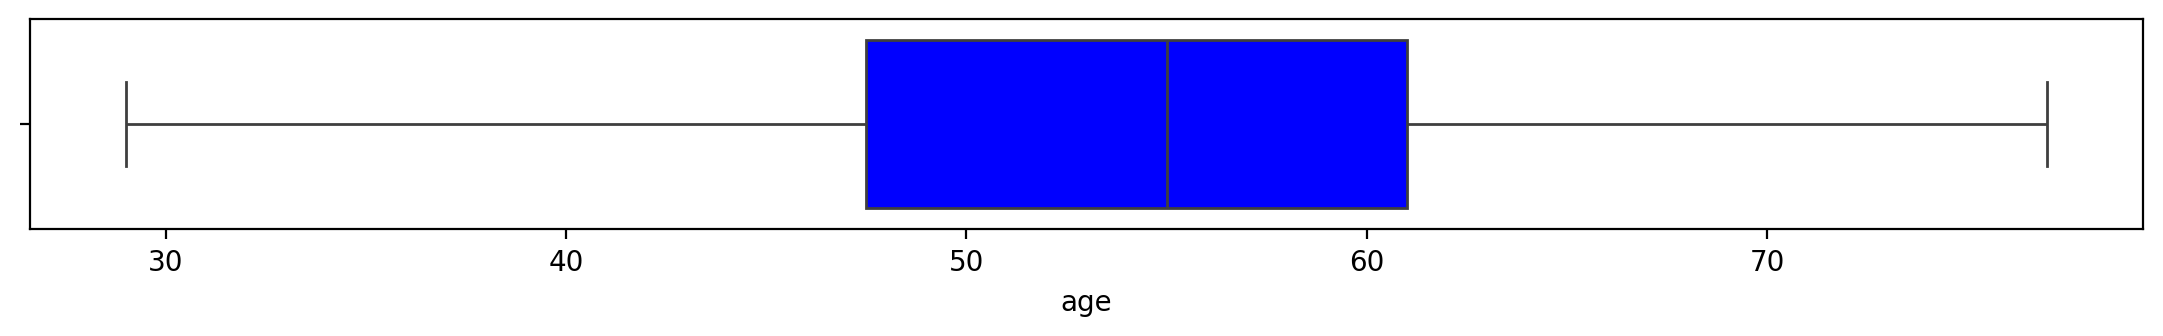

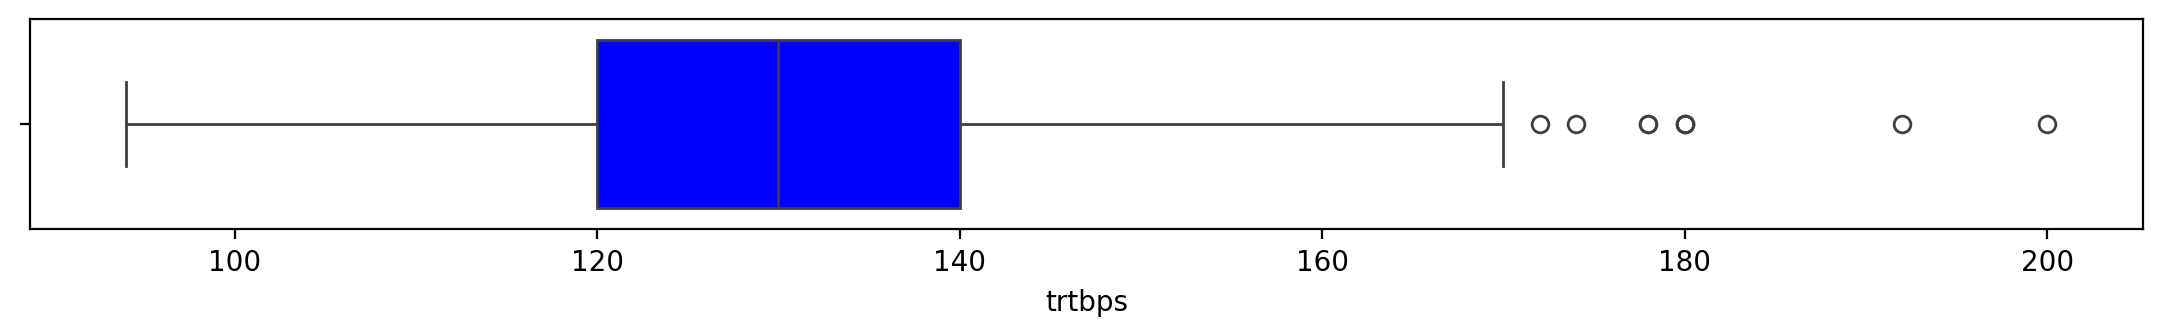

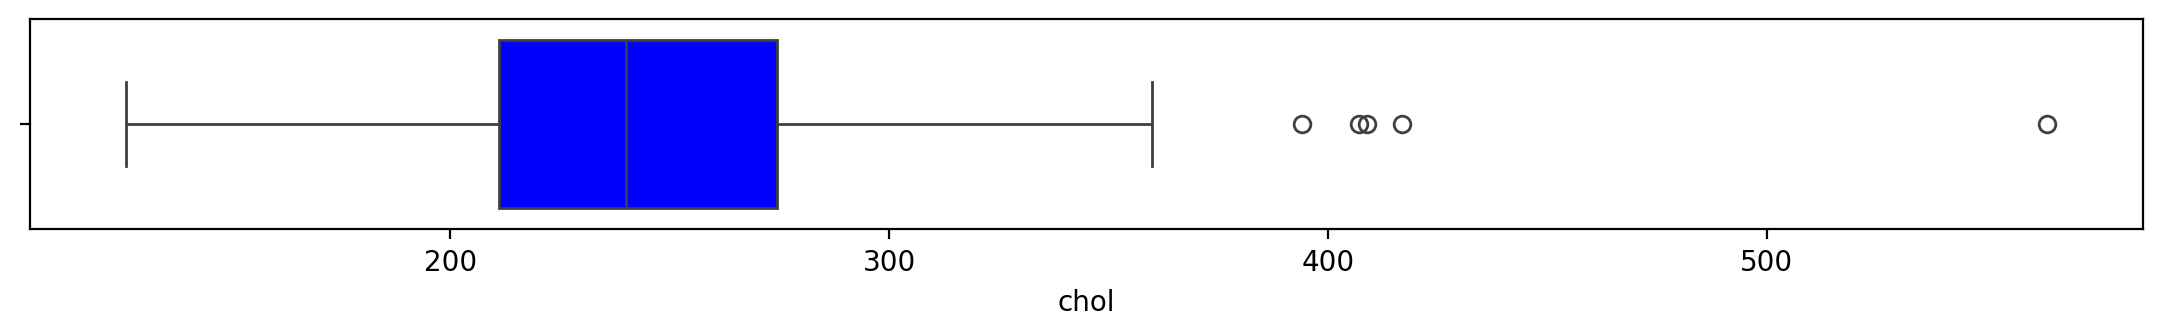

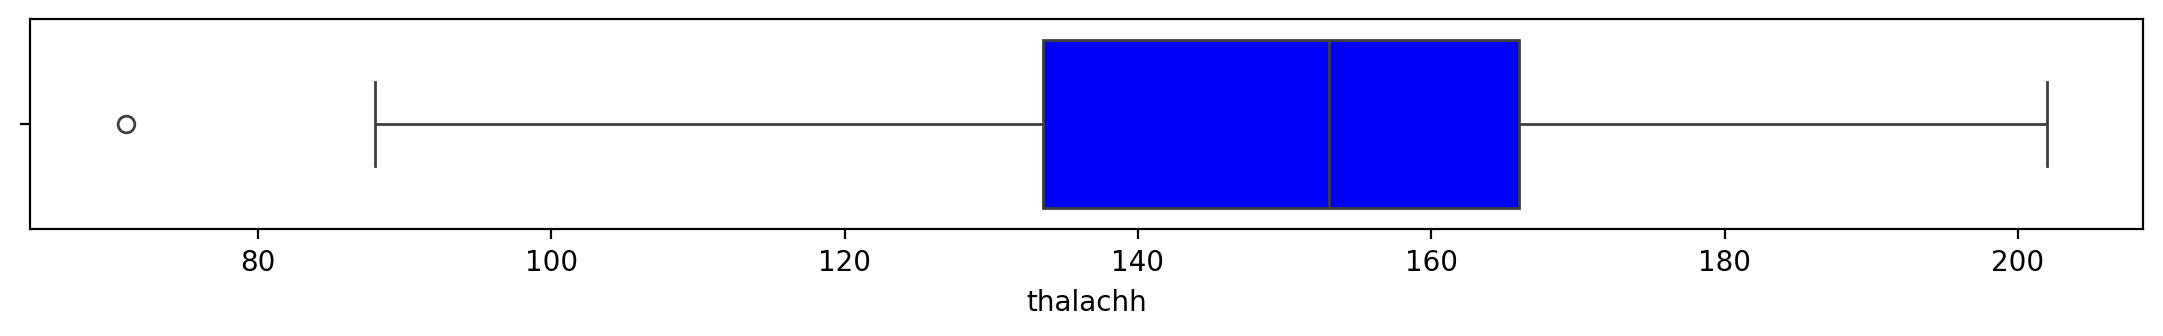

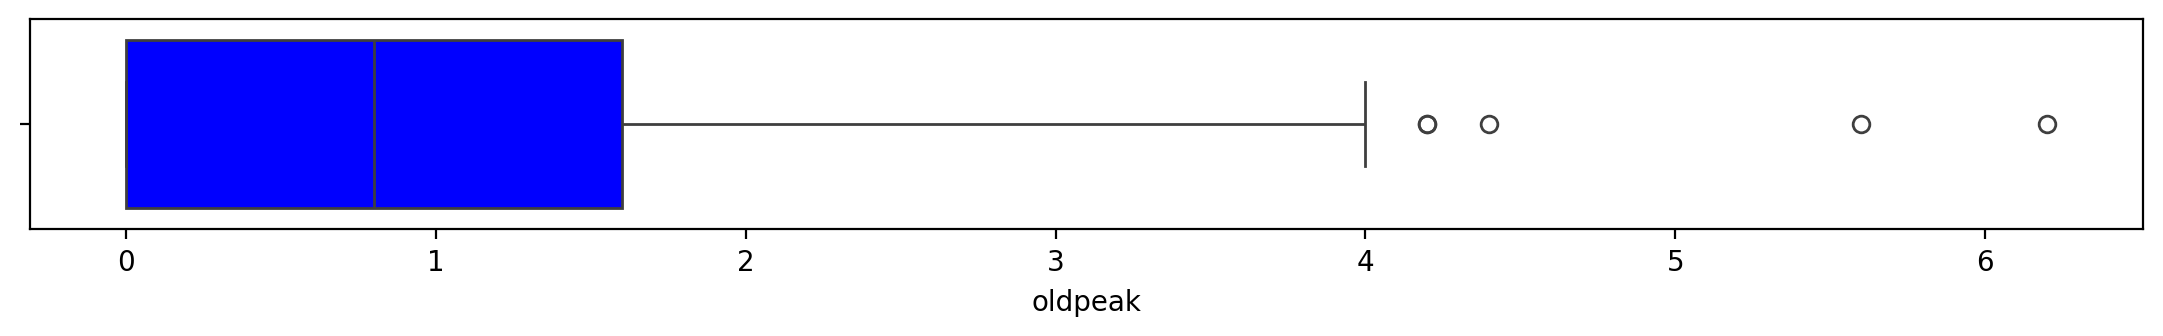

In [11]:
Numerical = ['age', 'trtbps','chol','thalachh','oldpeak']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = Main_Dataset,
           boxprops = dict(facecolor = "blue"))
    i += 1
    plt.show()

brisanje noisy data

In [16]:
Chol_noise = Main_Dataset[Main_Dataset["chol"]>500].index
Chol_noise

Index([85], dtype='int64')

In [17]:
Main_Dataset.drop(index=[85], inplace=True)
Main_Dataset.shape

(302, 14)

prikazano bez noisy data

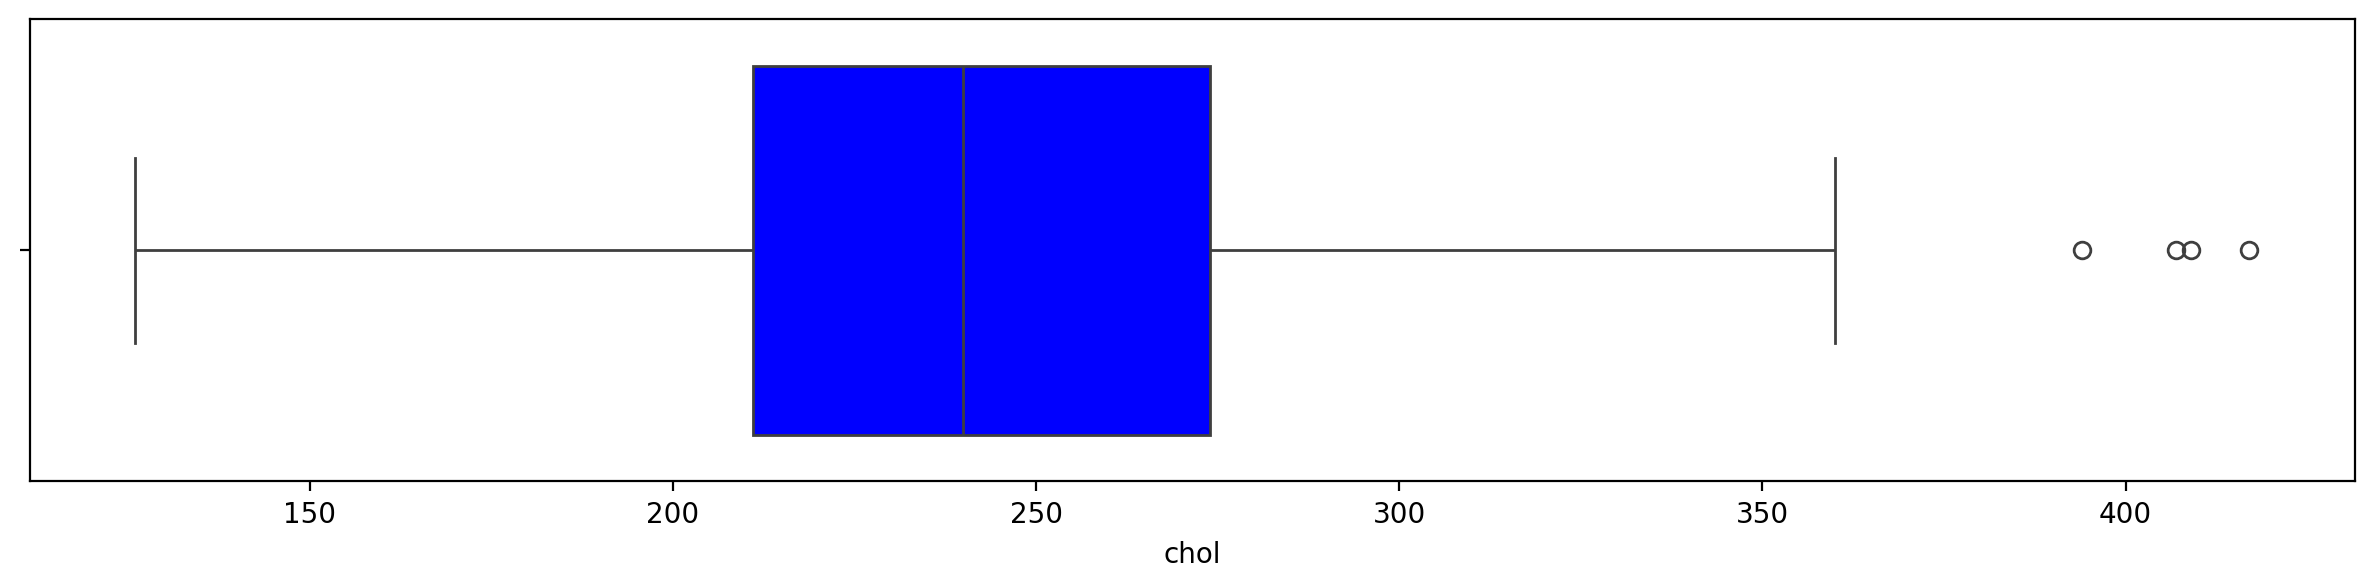

In [19]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'chol', data = Main_Dataset,
        boxprops = dict(facecolor = "blue"))
    
plt.show()

brisanje noisy data u krvnom pritisku

In [22]:
Chol_noise = Main_Dataset[Main_Dataset["trtbps"]>190].index
Chol_noise

Index([223, 248], dtype='int64')

In [23]:
Main_Dataset.drop(index=[223], inplace=True)
Main_Dataset.shape
Main_Dataset.drop(index=[248], inplace=True)
Main_Dataset.shape

(300, 14)

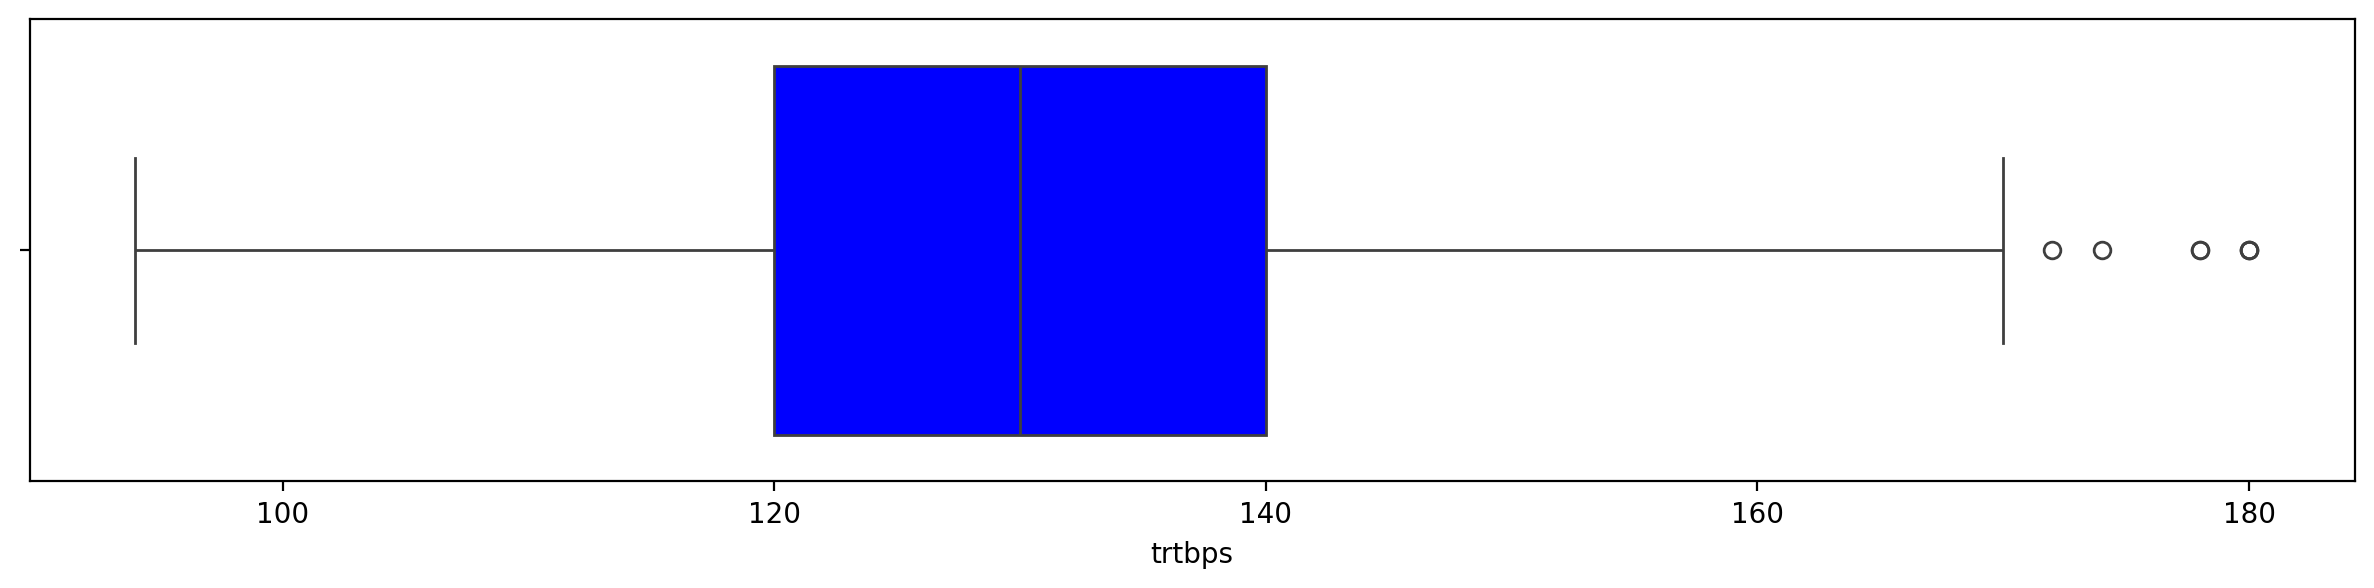

In [24]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'trtbps', data = Main_Dataset,
        boxprops = dict(facecolor = "blue"))
    
plt.show()

podelicemo u dve tabele sa ljudima koji su imali srcane bolesti i oni koji nisu imali pomocu kolone output

In [26]:
bezbolesti_data = Main_Dataset[Main_Dataset["output"]==0]
bezbolesti_data = pd.DataFrame(bezbolesti_data)
sabolestima_data = Main_Dataset[Main_Dataset["output"]==1]
sabolestima_data = pd.DataFrame(sabolestima_data)
print(" Not disease",bezbolesti_data.shape)
print("Disease",sabolestima_data.shape)
bezbolesti_data.sort_values(by=['age'], inplace=True)
sabolestima_data.sort_values(by=['age'], inplace=True)

 Not disease (136, 14)
Disease (164, 14)


graficki prikaz holesterola po godinama gde imaju bolesti ibez njih

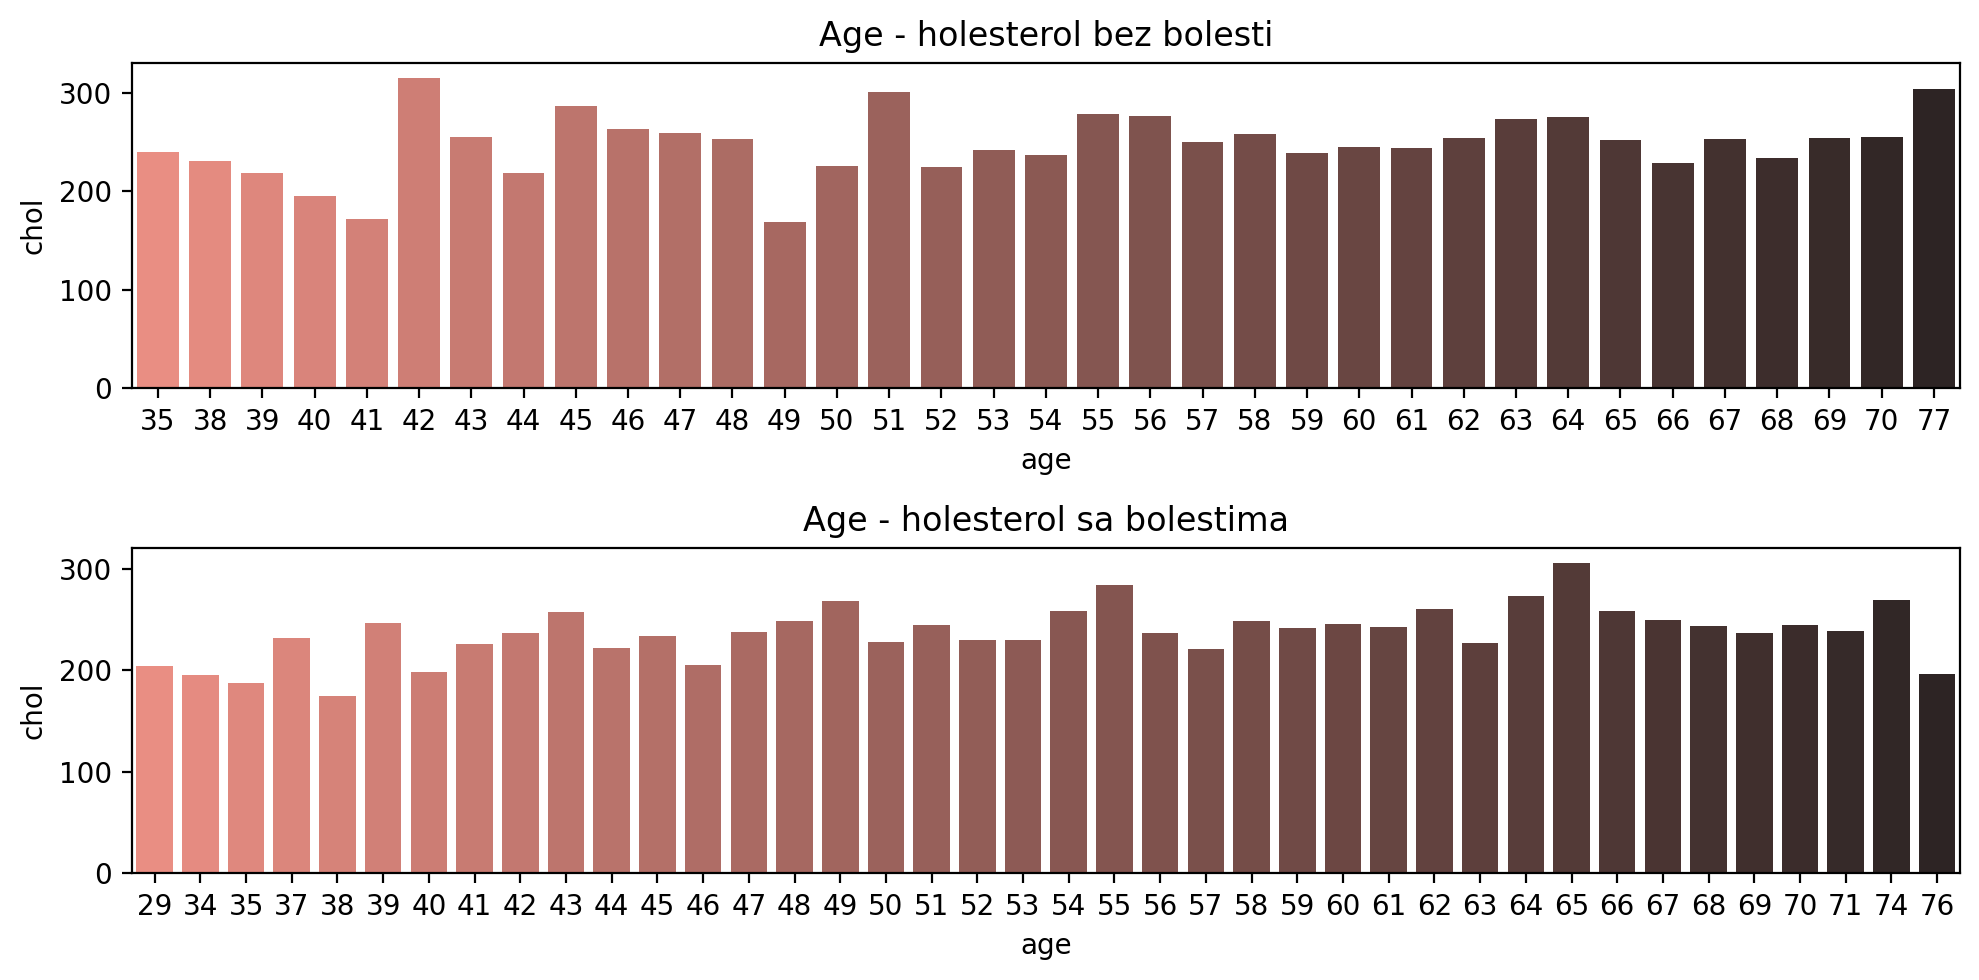

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= bezbolesti_data['age'], y= bezbolesti_data['chol'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - holesterol bez bolesti')
sns.barplot(x= sabolestima_data['age'], y= sabolestima_data['chol'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - holesterol sa bolestima')


plt.tight_layout()

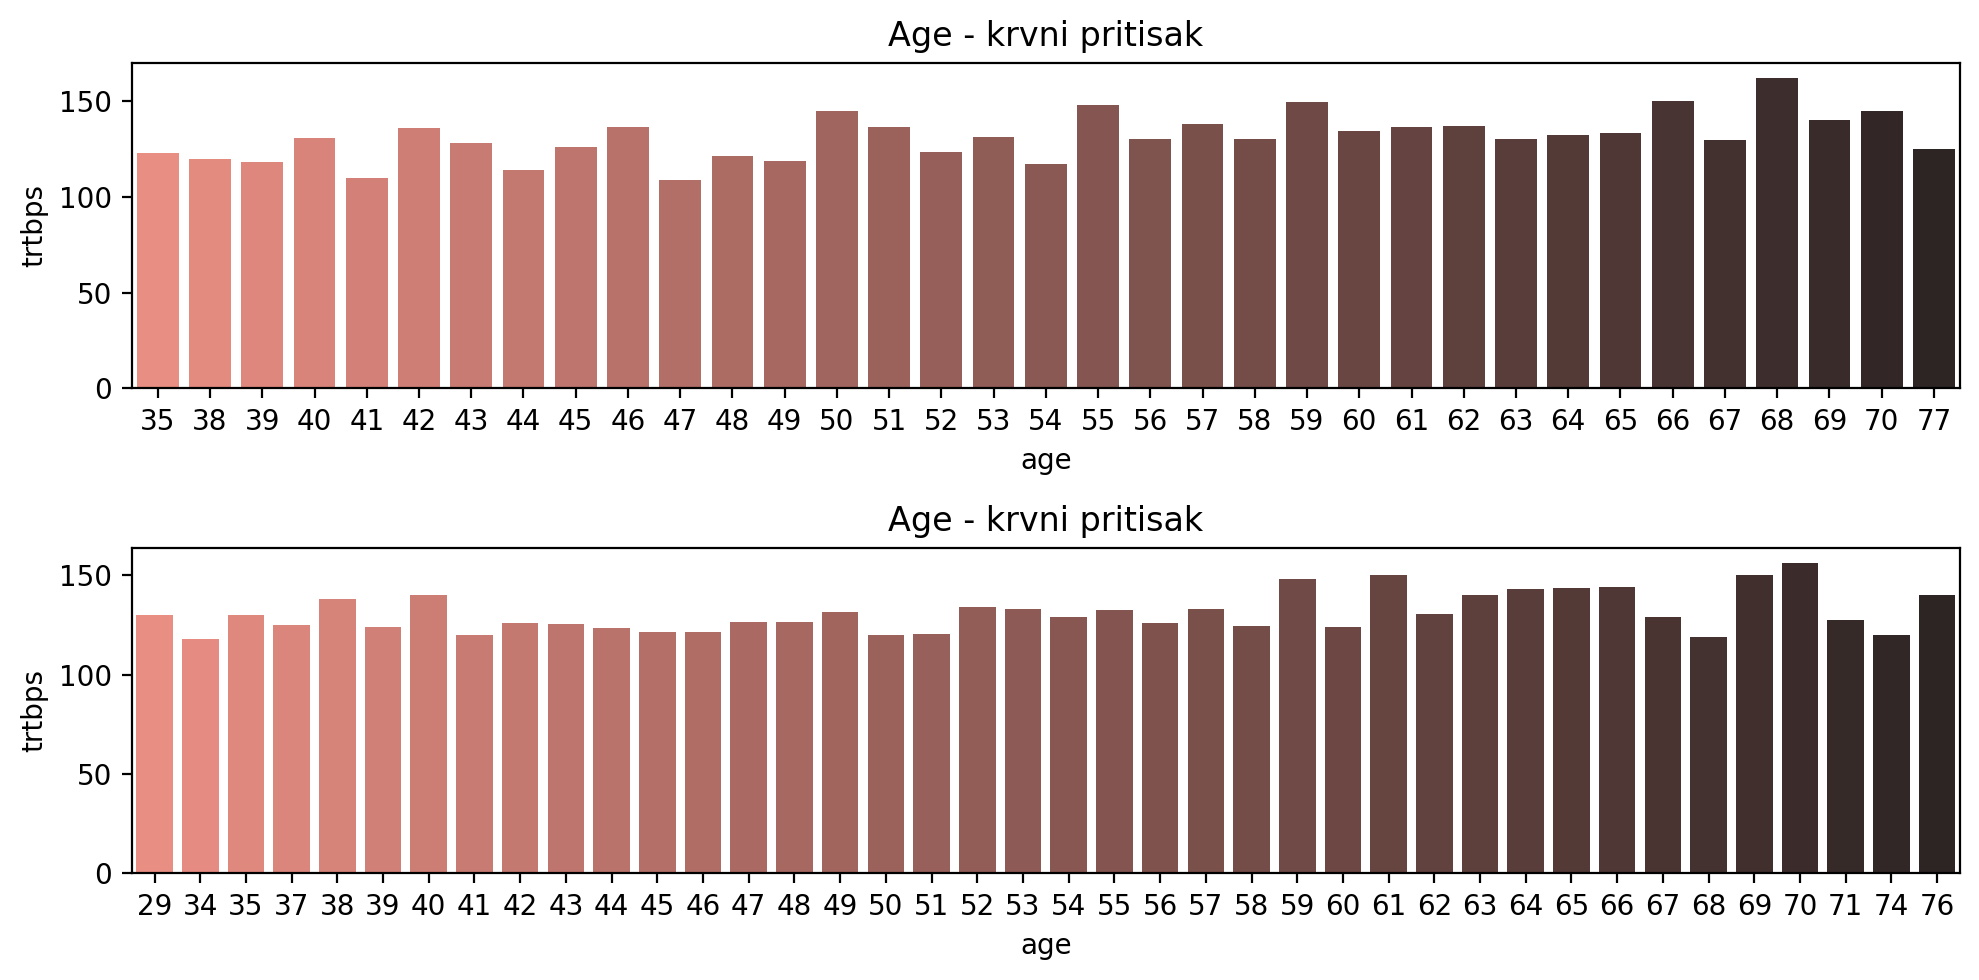

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= bezbolesti_data['age'], y= bezbolesti_data['trtbps'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - krvni pritisak')
sns.barplot(x= sabolestima_data['age'], y= sabolestima_data['trtbps'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - krvni pritisak')

plt.tight_layout()

ko vise oboljeva muskarci ili zene

<Axes: xlabel='sex', ylabel='count'>

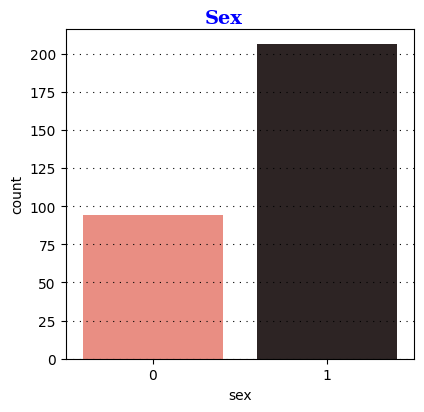

In [44]:
background_color = "white"
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax1 = fig.add_subplot(gs[0,1])
ax1.set_facecolor(background_color) 
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="blue")
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=Main_Dataset,x='sex',palette="dark:salmon_r")



sledi normalizacija uz pomocu scaler biblioteke

In [46]:
from sklearn.preprocessing import MinMaxScaler
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)
Norm_df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

ModuleNotFoundError: No module named 'sklearn'